# Importing and Understanding Data

In [ ]:
# Import the libs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pickle

In [ ]:
path='/content/drive/MyDrive/Telco-Customer-Churn.csv'

In [ ]:
df=pd.read_csv(path)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# remove the customer Id column

df.drop('customerID',axis=1,inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# unique values in each column

for col in df.columns:
  print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

We can take a conclusion from that is :

SeniorCitizen must be categorical data because has minimum value is 0 and the maximum value is 1.

The average customer stayed in the company is 32 months and 75% of customer has a tenure of 55 month

Average monthly charges are USD 64.76 and 25% of customers pay more than USD 89.85

# Data Preprocessing


In [ ]:
# total charges is numeric not object

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
# let's check if our dataset is imbalance

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df.isna().sum() # we have 11 null values in TotalCharges

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# the rows with null values in TotalCharges

df[df['TotalCharges'].isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [ ]:
# all thses rows have tenure as 0 even though the monthly charges are not 0 (which should not happen). lets see if other rows have tenre as 0.

df[df['tenure']==0]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [ ]:
# these are the exact rows which had null values. So remove them

df.dropna(inplace=True)

In [ ]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

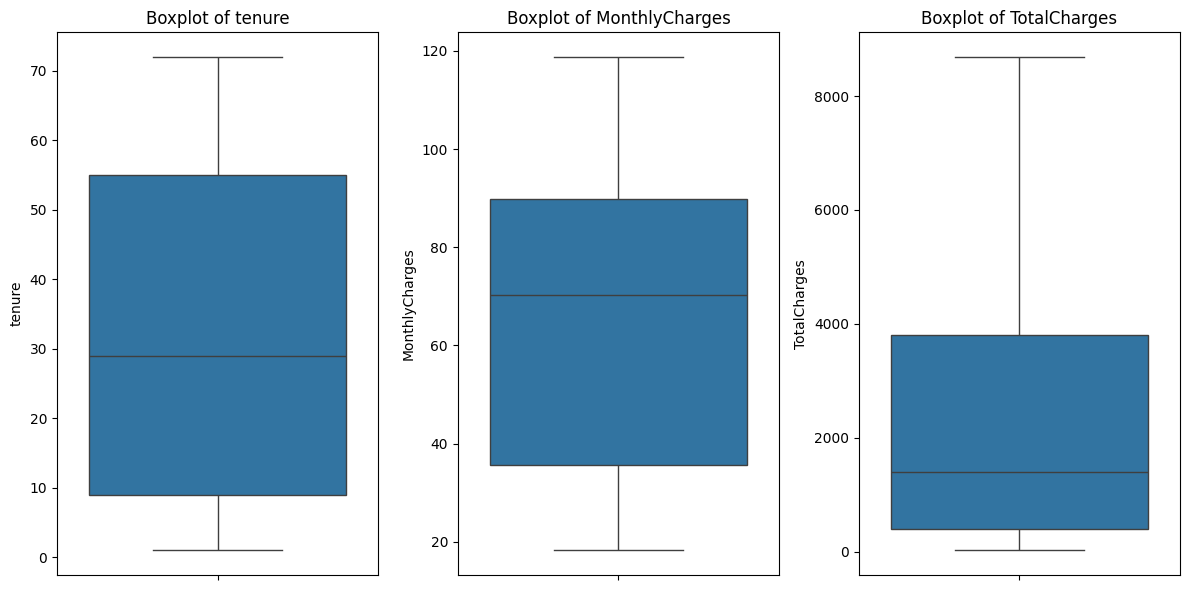

In [ ]:
# Checking outliers

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create subplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [ ]:
value_counts = df.apply(lambda col: col.value_counts().to_dict())
print(value_counts)

gender                                 {'Male': 3549, 'Female': 3483}
SeniorCitizen                               {'No': 5890, 'Yes': 1142}
Partner                                     {'No': 3639, 'Yes': 3393}
Dependents                                  {'No': 4933, 'Yes': 2099}
tenure              {1: 613, 72: 362, 2: 238, 3: 200, 4: 176, 71: ...
PhoneService                                 {'Yes': 6352, 'No': 680}
MultipleLines       {'No': 3385, 'Yes': 2967, 'No phone service': ...
InternetService        {'Fiber optic': 3096, 'DSL': 2416, 'No': 1520}
OnlineSecurity      {'No': 3497, 'Yes': 2015, 'No internet service...
OnlineBackup        {'No': 3087, 'Yes': 2425, 'No internet service...
DeviceProtection    {'No': 3094, 'Yes': 2418, 'No internet service...
TechSupport         {'No': 3472, 'Yes': 2040, 'No internet service...
StreamingTV         {'No': 2809, 'Yes': 2703, 'No internet service...
StreamingMovies     {'No': 2781, 'Yes': 2731, 'No internet service...
Contract            

# Data Visualization

### Univariate Analysis

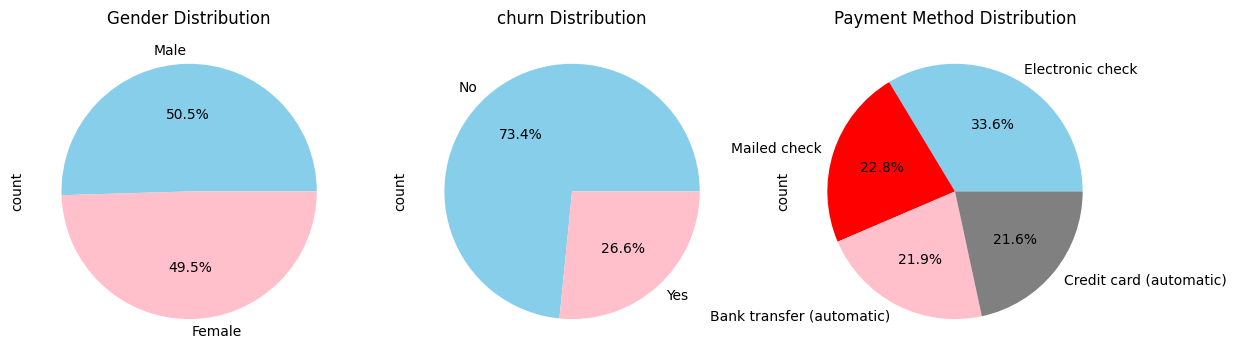

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.subplot(1, 3, 2)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('churn Distribution')
plt.subplot(1, 3, 3)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'red','pink','grey'])
plt.title('Payment Method Distribution')
plt.show()

### Bar Plots for Categorical Features vs. Churn

In [ ]:
categorical_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
def plot_churn_by_category(df, column, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1')
    plt.title(title, fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)  # Rotate x-labels if needed
    plt.tight_layout()
    plt.show()

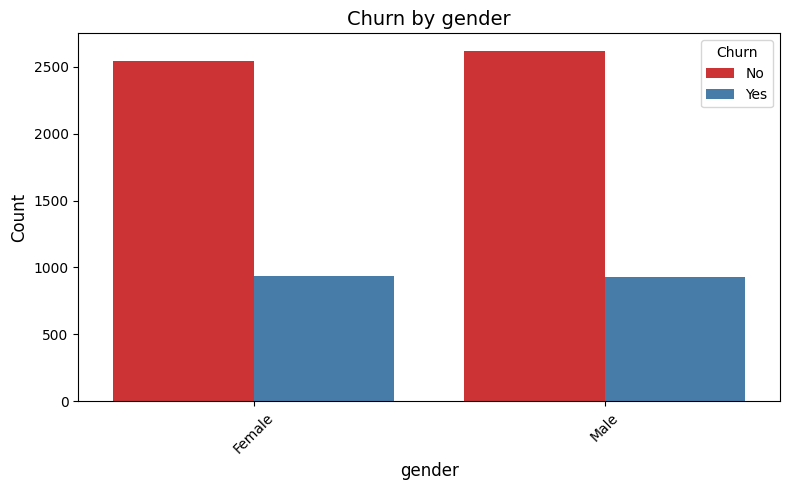

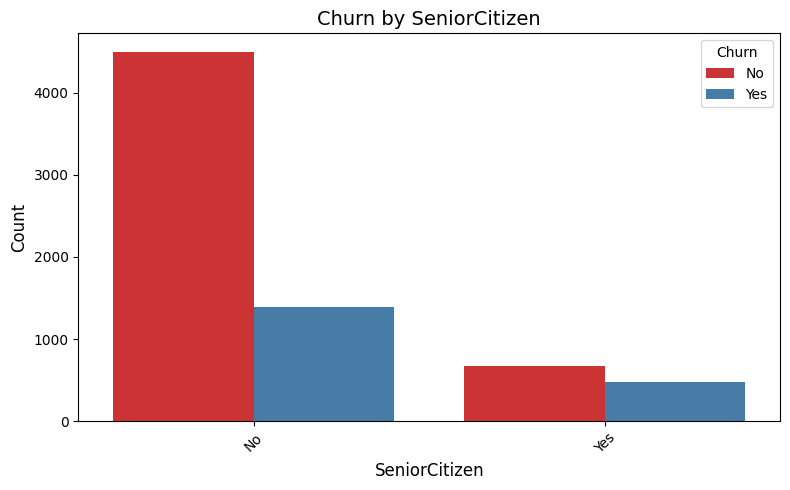

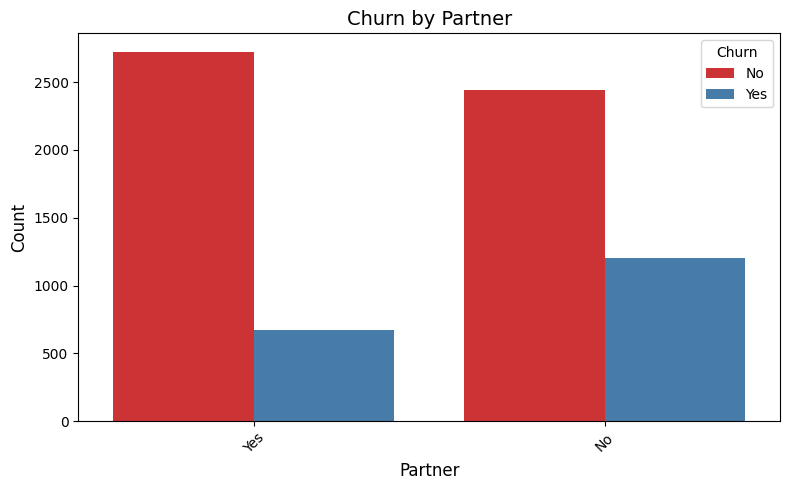

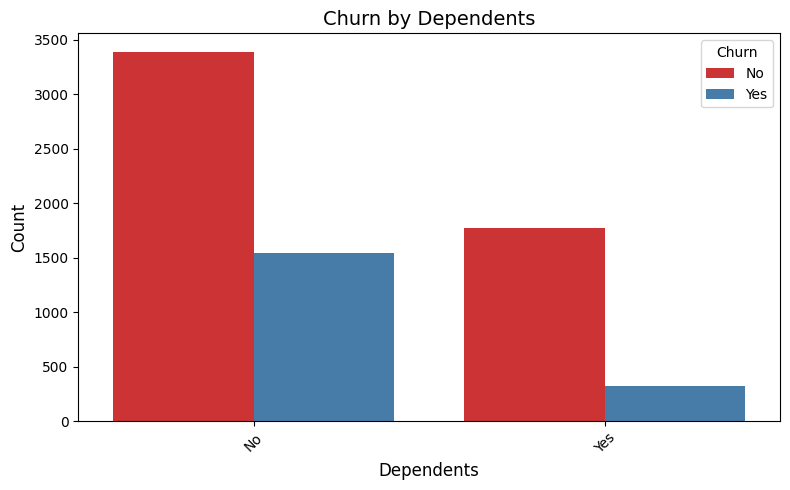

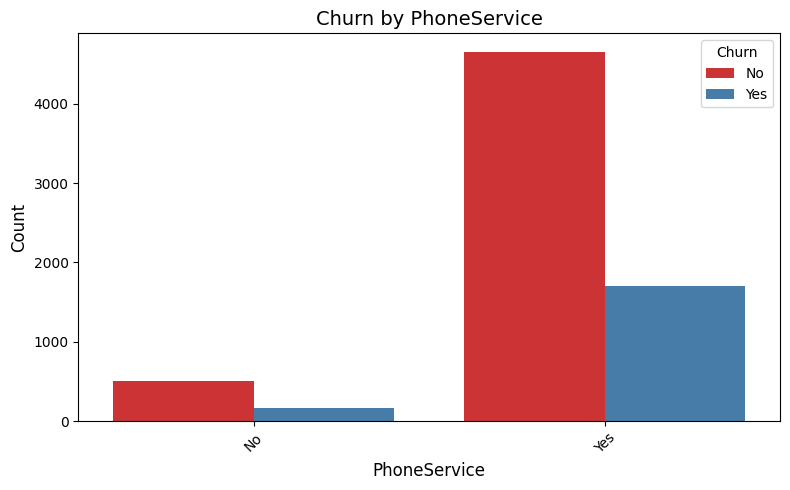

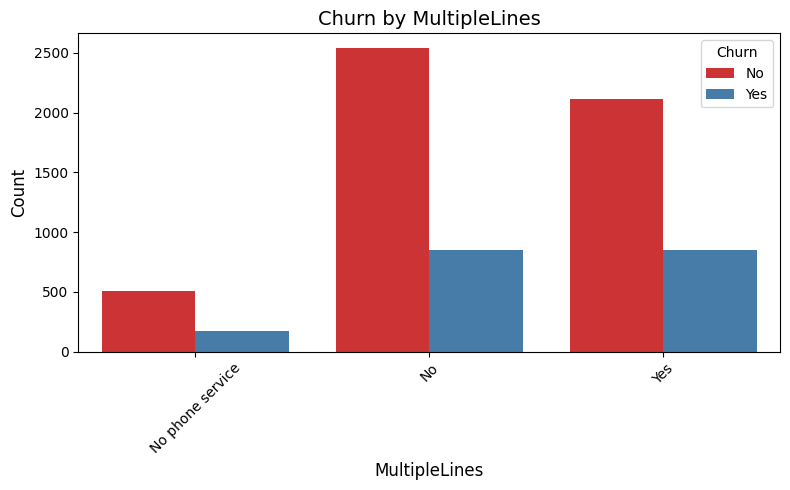

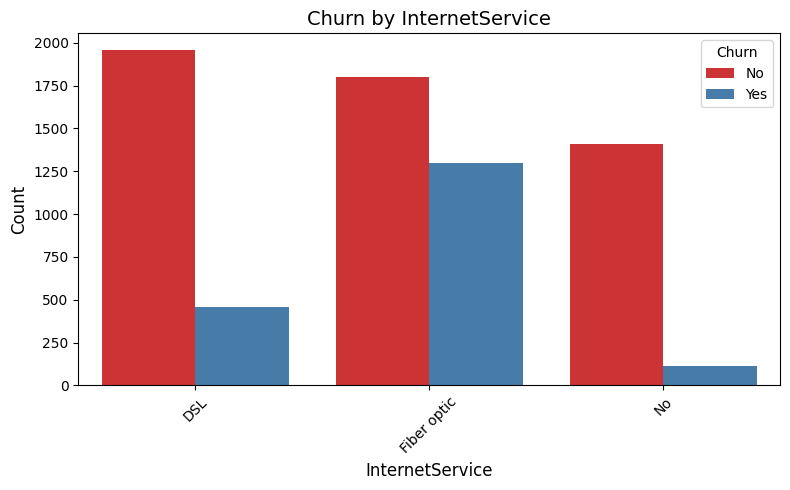

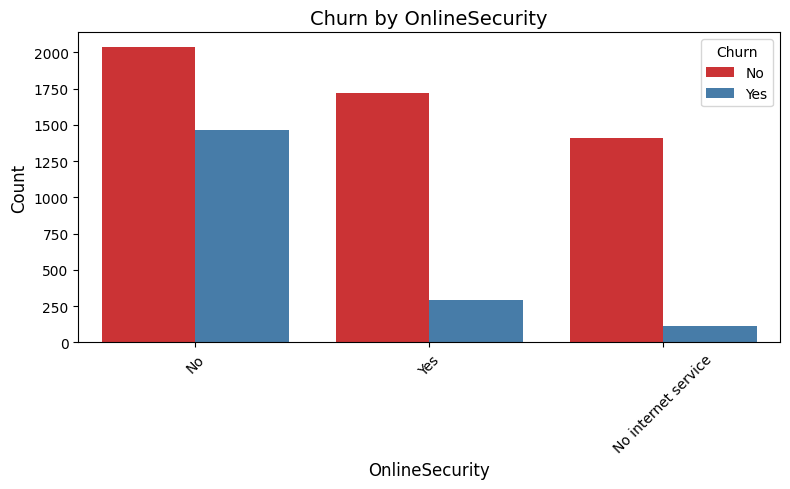

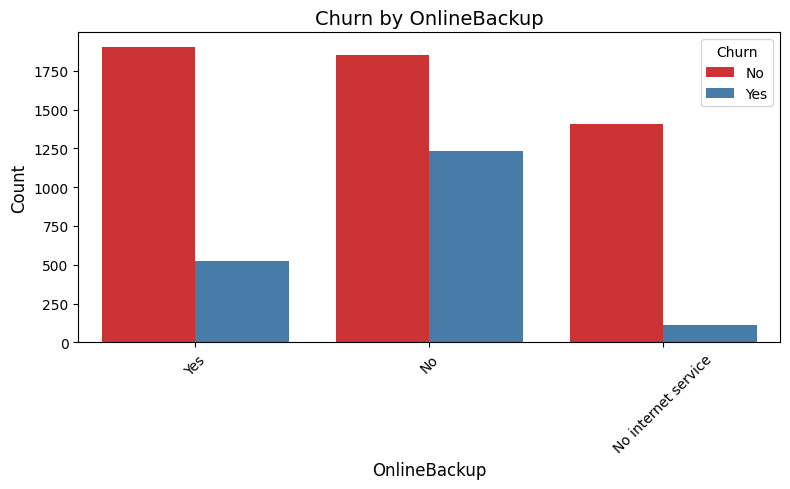

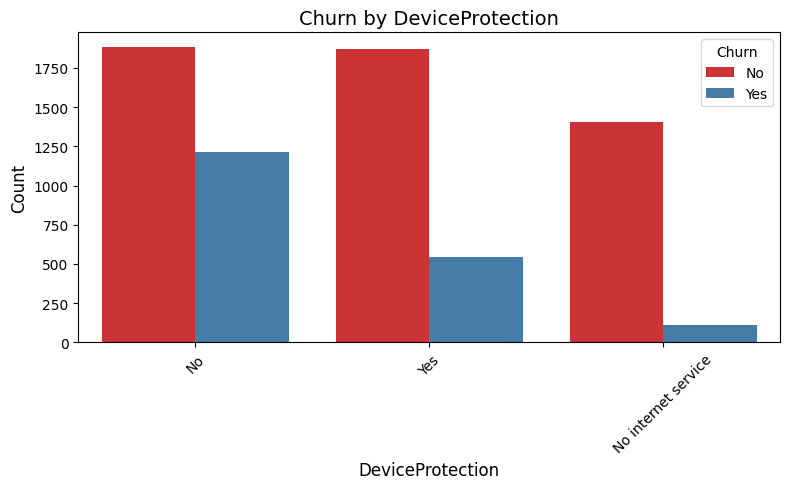

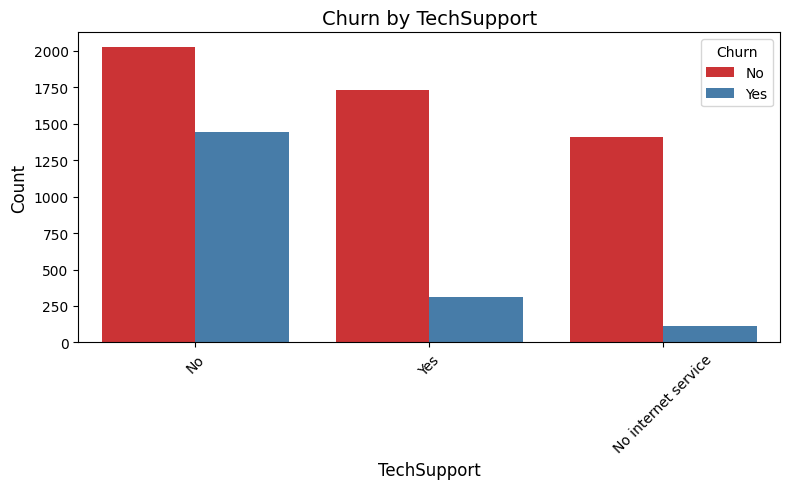

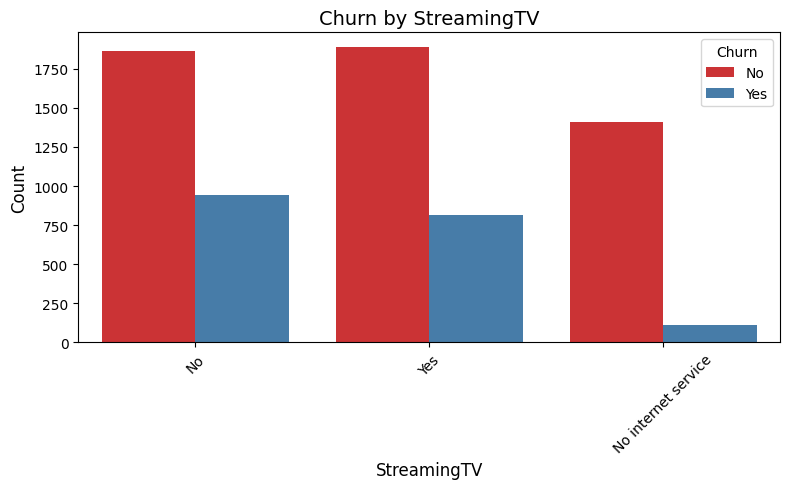

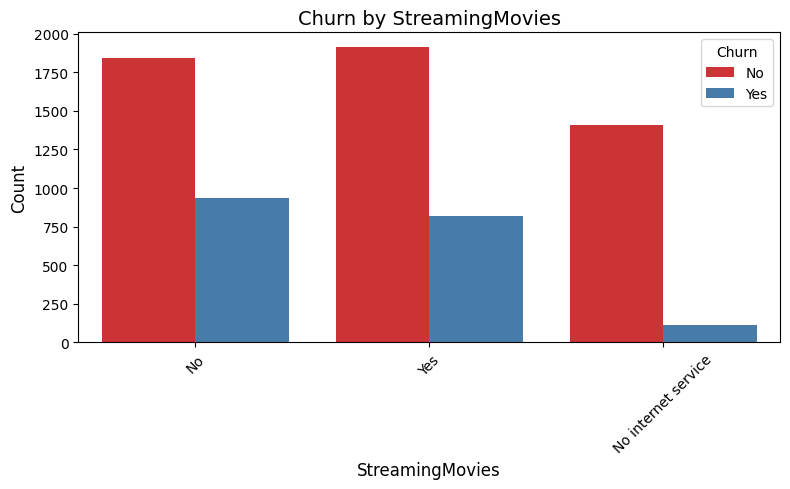

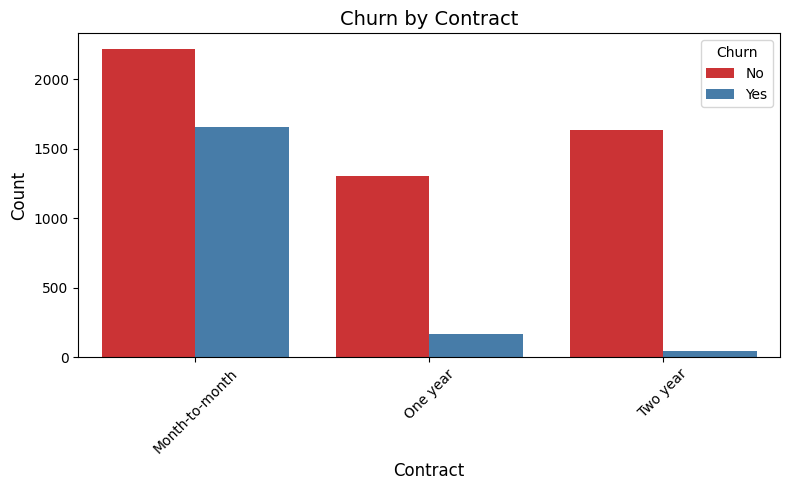

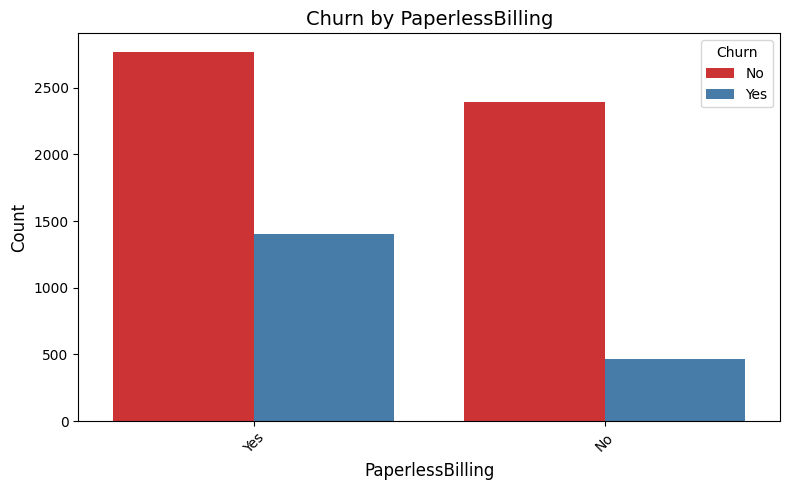

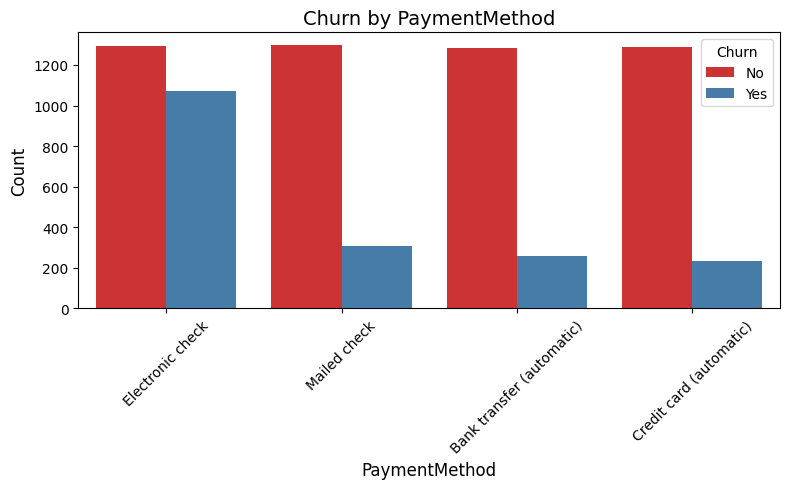

In [ ]:
for i in categorical_columns:
  plot_churn_by_category(df,i,f'Churn by {i}')

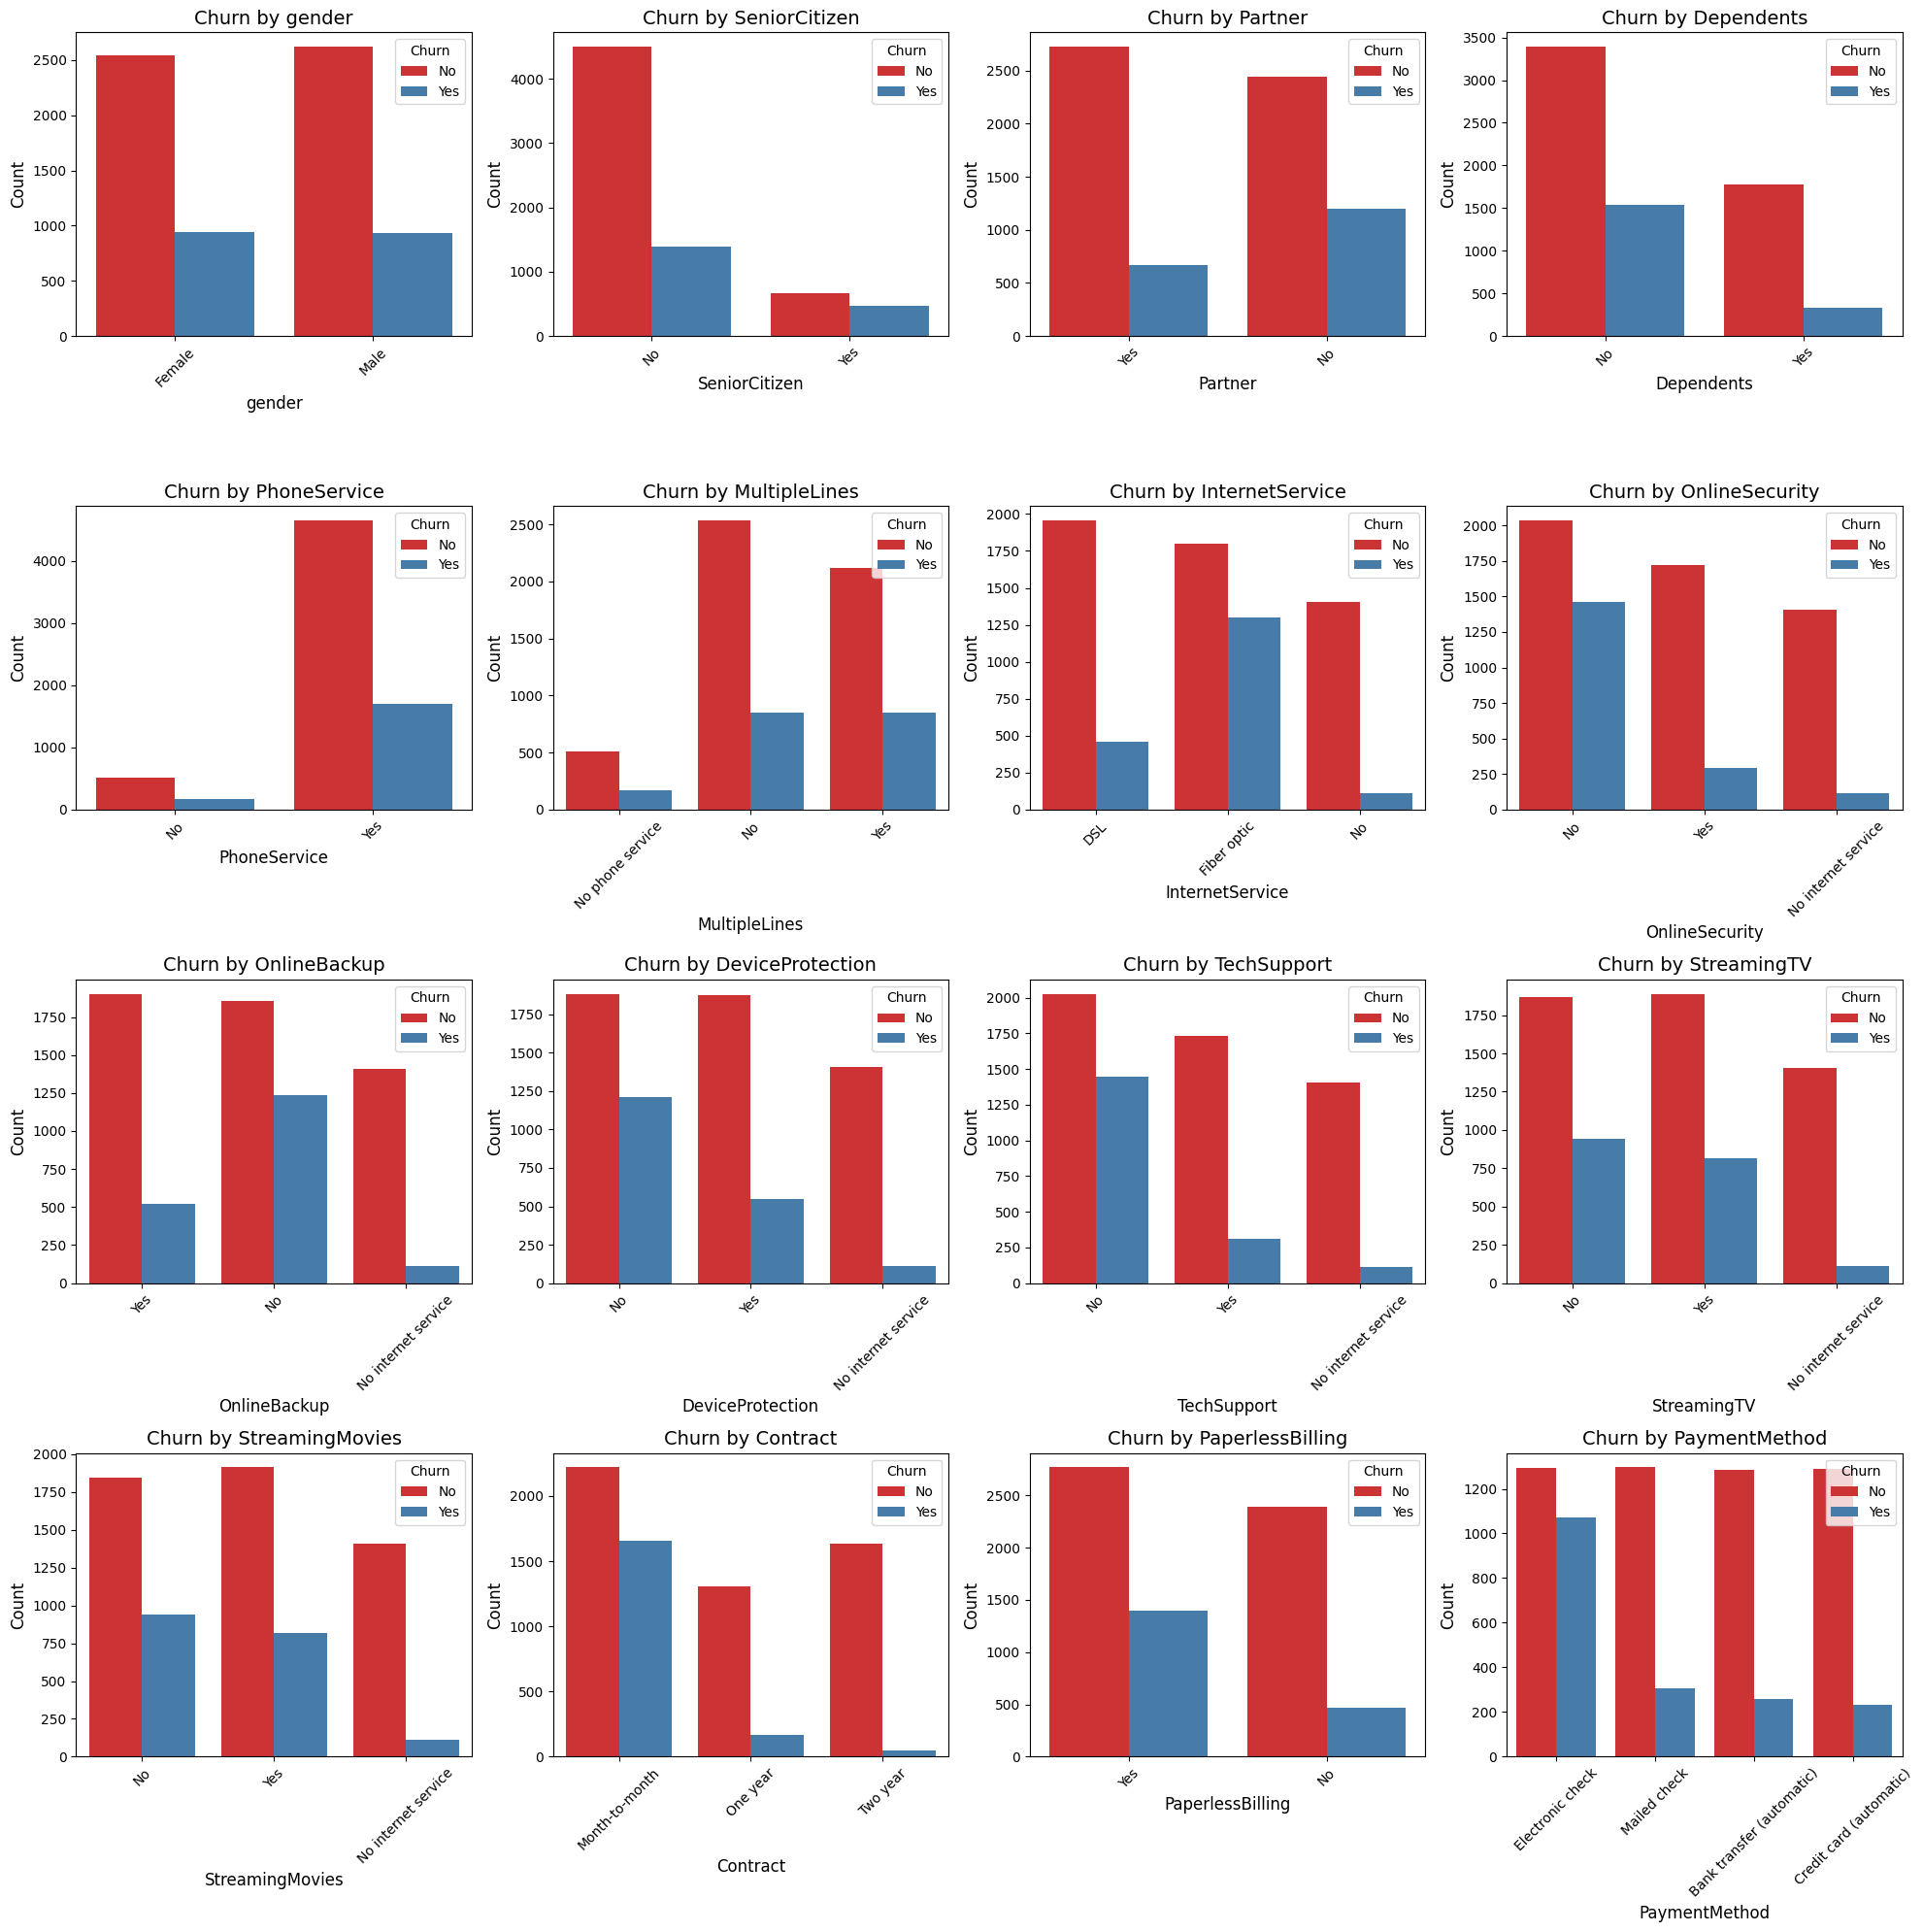

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your list of categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Define the plotting function (unchanged)
def plot_churn_by_category(df, column, title, ax=None):
    if ax is None:  # Fallback for standalone use
        plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1', ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Churn', loc='upper right')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels if needed
    if ax is None:  # Only call tight_layout and show if standalone
        plt.tight_layout()
        plt.show()

# Create a figure with subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through categorical columns and plot using the function
for i, column in enumerate(categorical_columns):
    plot_churn_by_category(df, column, f'Churn by {column}', ax=axes[i])

# Adjust layout for the entire figure
plt.tight_layout()
plt.show()

###  Plots for Numerical  Features vs. Churn

In [ ]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

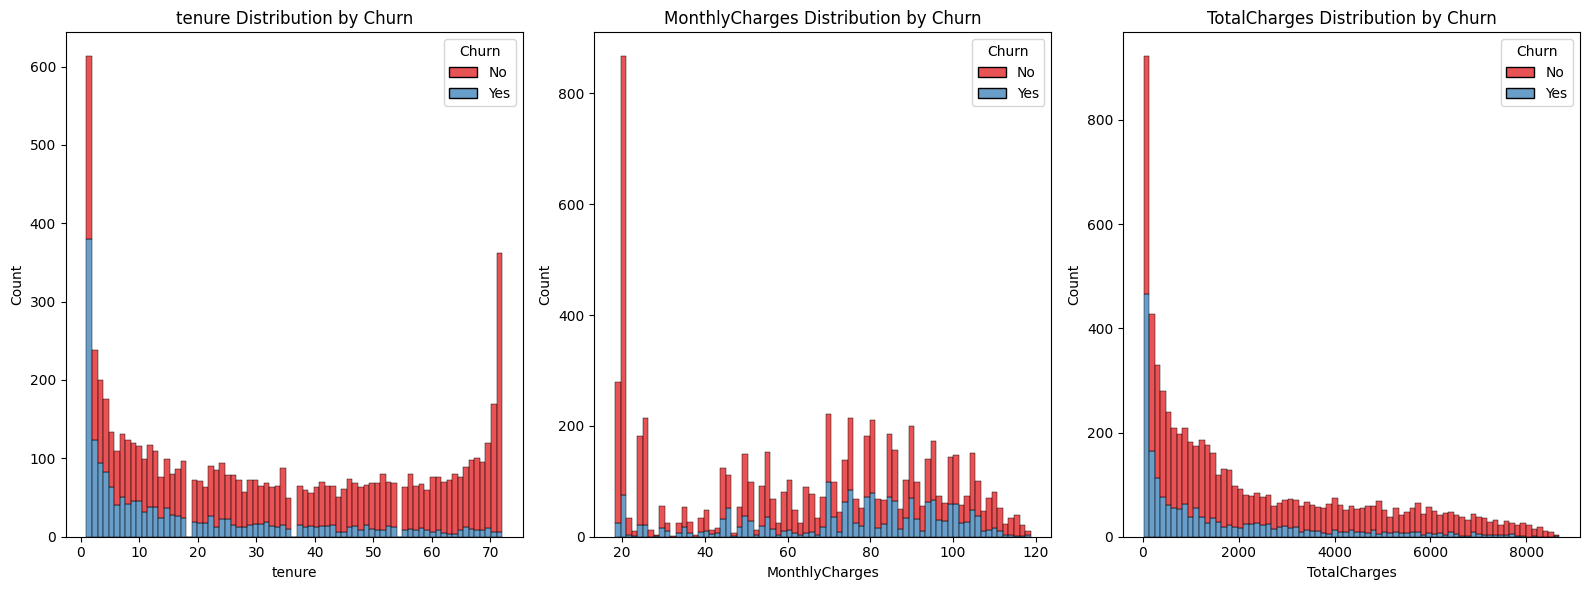

In [ ]:
# plot histograms
a=1
plt.figure(figsize=(16, 6))
for i in numerical_cols:
  plt.subplot(1, 3, a)
  sns.histplot(data=df, x=i, hue='Churn', multiple='stack', palette='Set1', bins=75)
  plt.title(f'{i} Distribution by Churn')
  plt.xlabel(i)
  plt.ylabel('Count')
  a+=1
plt.tight_layout()
plt.show()


A Kernel Density Estimate (KDE) plot is a smoothed version of a histogram that estimates the probability density function (PDF) of a continuous variable. It shows where values are concentrated over a range.

Unlike a histogram (which shows counts), the y-axis in a KDE plot represents the estimated density, not actual counts.

The total area under the KDE curve sums to 1 (like a probability distribution).

The height of the curve at any point indicates the relative likelihood of values near that point.

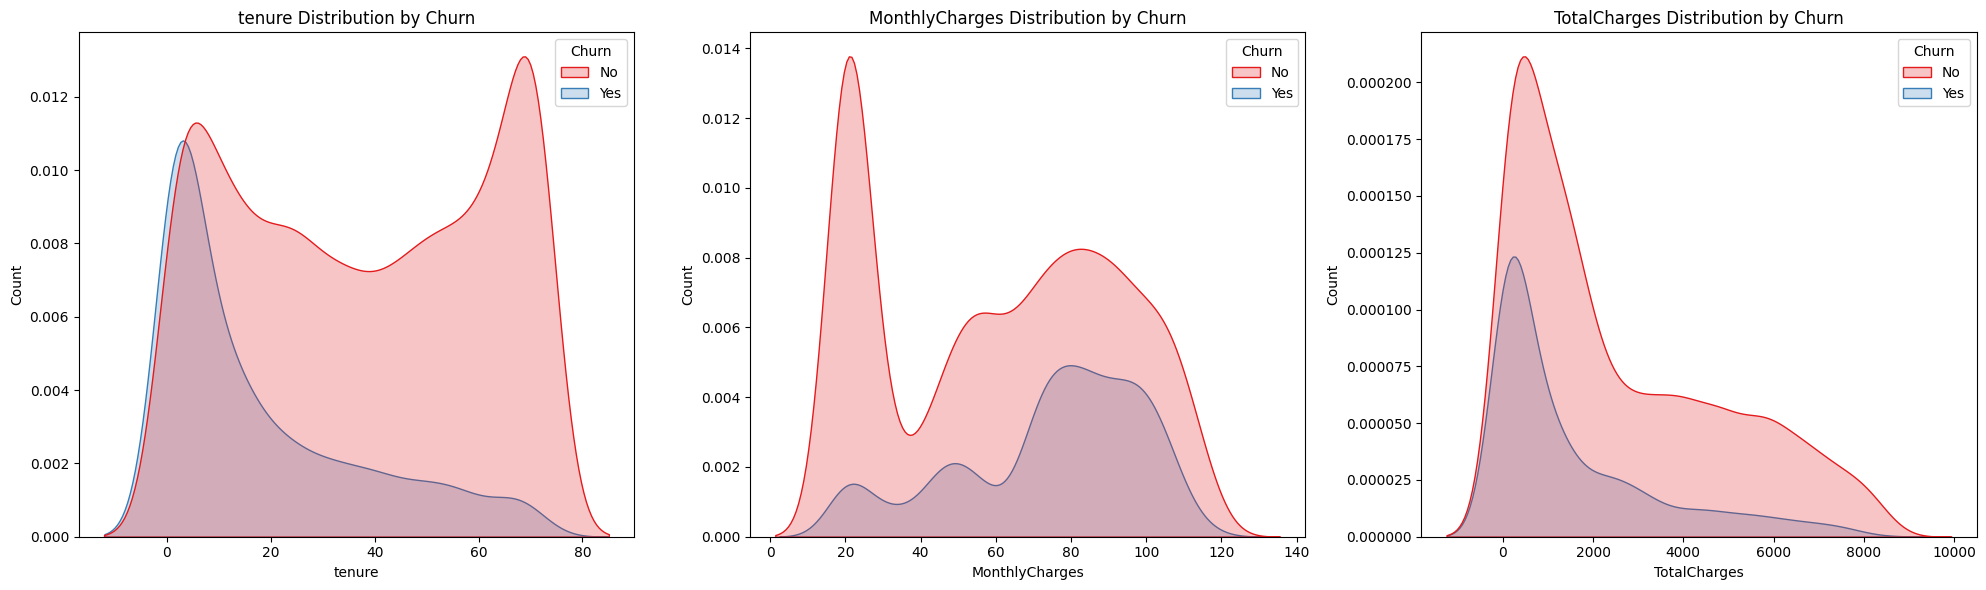

In [ ]:
# KDE (smoother alternative)


a=1
plt.figure(figsize=(20, 6))
for i in numerical_cols:
  plt.subplot(1, 3, a)
  sns.kdeplot(data=df, x=i, hue='Churn', fill=True, palette='Set1')
  plt.title(f'{i} Distribution by Churn')
  plt.xlabel(i)
  plt.ylabel('Count')
  a+=1
plt.tight_layout()
plt.show()

<ipython-input-116-7dc7b2c99214>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set1')
<ipython-input-116-7dc7b2c99214>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set1')
<ipython-input-116-7dc7b2c99214>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set1')


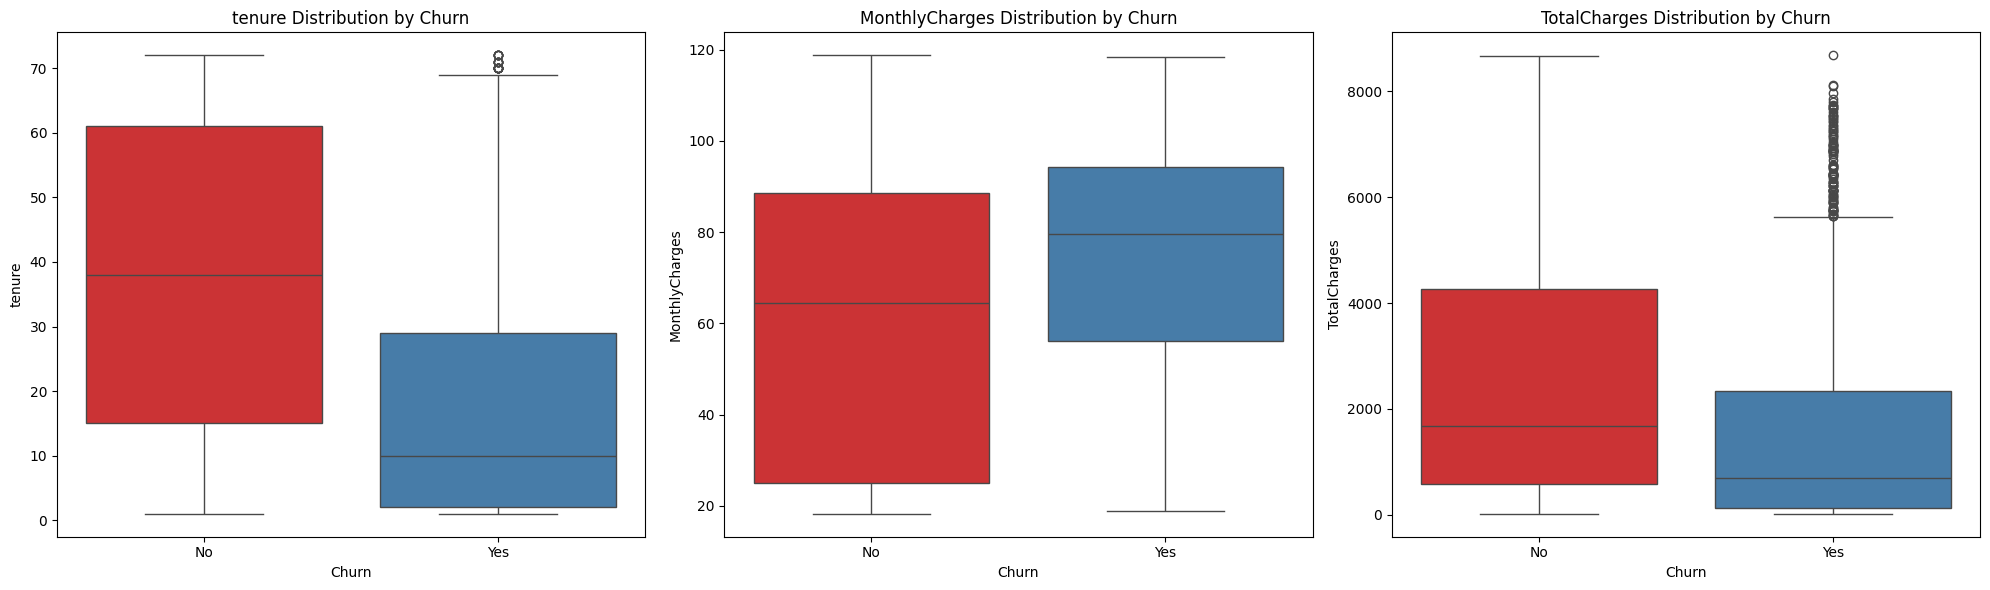

In [ ]:
# boxplot


plt.figure(figsize=(20, 6))
for idx, col in enumerate(numerical_cols, start=1):  # Using enumerate for indexing
    plt.subplot(1, 3, idx)
    sns.boxplot(data=df, x='Churn', y=col, palette='Set1')
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel('Churn')  # Churn is categorical, so it stays as x-axis
    plt.ylabel(col)  # Labeling with the actual numerical column

plt.tight_layout()  # Prevents overlap
plt.show()


# Model Building

## For Classification

In [ ]:
# Customers who left within the last month – the column is called Churn

In [ ]:
# reindex the rows

df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# divide features and target

X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

In [ ]:
X.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65

In [ ]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [ ]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# One hot encoding

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = ohe.fit_transform(X[categorical_features])
X_encoded = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out())

In [ ]:
X_encoded

gender_Female  gender_Male  SeniorCitizen_No  SeniorCitizen_Yes  \
0               1.0          0.0               1.0                0.0   
1               0.0          1.0               1.0                0.0   
2               0.0          1.0               1.0                0.0   
3               0.0          1.0               1.0                0.0   
4               1.0          0.0               1.0                0.0   
...             ...          ...               ...                ...   
7027            0.0          1.0               1.0                0.0   
7028            1.0          0.0               1.0                0.0   
7029            1.0          0.0               1.0                0.0   
7030            0.0          1.0               0.0                1.0   
7031            0.0          1.0               1.0                0.0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0            0.0          1.0            1.0             0.0              1.0   
1            1.0          0.0            1.0             0.0              0.0   
2            1.0          0.0            1.0             0.0              0.0   
3            1.0          0.0            1.0             0.0              1.0   
4            1.0          0.0            1.0             0.0              0.0   
...          ...          ...            ...             ...              ...   
7027         0.0          1.0            0.0             1.0              0.0   
7028         0.0          1.0            0.0             1.0              0.0   
7029         0.0          1.0            0.0             1.0              1.0   
7030         0.0          1.0            1.0             0.0              0.0   
7031         1.0          0.0            1.0             0.0              0.0   

      PhoneService_Yes  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0                  0.0  ...                  0.0                      1.0   
1                  1.0  ...                  0.0                      0.0   
2                  1.0  ...                  0.0                      1.0   
3                  0.0  ...                  0.0                      0.0   
4                  1.0  ...                  0.0                      1.0   
...                ...  ...                  ...                      ...   
7027               1.0  ...                  1.0                      0.0   
7028               1.0  ...                  1.0                      0.0   
7029               0.0  ...                  0.0                      1.0   
7030               1.0  ...                  0.0                      1.0   
7031               1.0  ...                  1.0                      0.0   

      Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                   0.0                0.0                  0.0   
1                   1.0                0.0                  1.0   
2                   0.0                0.0                  0.0   
3                   1.0                0.0                  1.0   
4                   0.0                0.0                  0.0   
...                 ...                ...                  ...   
7027                1.0                0.0                  0.0   
7028                1.0                0.0                  0.0   
7029                0.0                0.0                  0.0   
7030                0.0                0.0                  0.0   
7031                0.0                1.0                  0.0   

      PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                      1.0                                      0.0   
1                      0.0                                      0.0   
2                      1.0                                      0.0   
3                      0.0                                      1.0   
4                      1.0                                      0.0   


In [ ]:
# Combine encoded categorical and numerical features
X_numerical = df[numerical_features]
X_final = pd.concat([X_numerical.reset_index(drop=True), X_encoded], axis=1)

In [ ]:
X_final.head()

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85            1.0          0.0   
1      34           56.95       1889.50            0.0          1.0   
2       2           53.85        108.15            0.0          1.0   
3      45           42.30       1840.75            0.0          1.0   
4       2           70.70        151.65            1.0          0.0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0               1.0                0.0         0.0          1.0   
1               1.0                0.0         1.0          0.0   
2               1.0                0.0         1.0          0.0   
3               1.0                0.0         1.0          0.0   
4               1.0                0.0         1.0          0.0   

   Dependents_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0            1.0  ...                  0.0                      1.0   
1            1.0  ...                  0.0                      0.0   
2            1.0  ...                  0.0                      1.0   
3            1.0  ...                  0.0                      0.0   
4            1.0  ...                  0.0                      1.0   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                0.0                0.0                  0.0   
1                1.0                0.0                  1.0   
2                0.0                0.0                  0.0   
3                1.0                0.0                  1.0   
4                0.0                0.0                  0.0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                   1.0                                      0.0   
1                   0.0                                      0.0   
2                   1.0                                      0.0   
3                   0.0                                      1.0   
4                   1.0                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0  

[5 rows x 46 columns]

In [ ]:

# Save feature names (for aligning test data)
with open("feature_names.pkl", "wb") as f:
    pickle.dump(X_final.columns.tolist(), f)

In [ ]:
# Encode target variable
y = LabelEncoder().fit_transform(df['Churn'])

In [ ]:

#  Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Scale numerical features

scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Save the scaler
with open("scaler_churn.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the encoder
with open("encoder_churn.pkl", "wb") as f:
    pickle.dump(ohe, f)

In [ ]:
with open("encoded_columns.pkl", "wb") as f:
    pickle.dump(ohe.get_feature_names_out().tolist(), f)

In [ ]:
# Hyper Parameter Tuning



# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [2.1,2.3,2.5,2.7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7]
}


In [ ]:
# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)


random_search.fit(X_train, y_train) #Fitting 5 folds for each of 100 candidates, totalling 500 fits


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:35:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [5, 7, 9],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [2.1, 2.3, 2.5,
                                                             2.7],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
# best parameters

random_search.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 2.7,
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.8}

In [ ]:
# Best model

best_model =  random_search.best_estimator_

In [ ]:
# save the model

with open("best_model_churn.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [ ]:
y_pred = best_model.predict(X_test)

## For Survival Analysis

In [ ]:
from lifelines import CoxPHFitter
from sksurv.util import Surv

In [ ]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# Create survival target: (event, time)

y_survival = np.array(
    [(bool(churn), tenure) for churn, tenure in zip(df['Churn'], df['tenure'])],
    dtype=[('event', '?'), ('time', '<f8')]
)


In [ ]:
# prompt: Convert y_survival into dataframe

y_survival = pd.DataFrame(y_survival)

In [ ]:
# Use the SAME features as classification (X_final from your code)

# After your classification preprocessing (X_final is ready)
X_survival = X_final.drop(columns=['tenure'])  # Remove tenure!


# Combine with survival target
survival_data = pd.concat([X_survival, df[['tenure', 'Churn']]], axis=1)

In [ ]:
X_survival.shape

(7032, 45)

In [ ]:
y_survival.shape

(7032, 2)

In [ ]:
survival_data.shape

(7032, 47)

In [ ]:
X_survival.head()

MonthlyCharges  TotalCharges  gender_Female  gender_Male  SeniorCitizen_No  \
0           29.85         29.85            1.0          0.0               1.0   
1           56.95       1889.50            0.0          1.0               1.0   
2           53.85        108.15            0.0          1.0               1.0   
3           42.30       1840.75            0.0          1.0               1.0   
4           70.70        151.65            1.0          0.0               1.0   

   SeniorCitizen_Yes  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0                0.0         0.0          1.0            1.0             0.0   
1                0.0         1.0          0.0            1.0             0.0   
2                0.0         1.0          0.0            1.0             0.0   
3                0.0         1.0          0.0            1.0             0.0   
4                0.0         1.0          0.0            1.0             0.0   

   ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0  ...                  0.0                      1.0                0.0   
1  ...                  0.0                      0.0                1.0   
2  ...                  0.0                      1.0                0.0   
3  ...                  0.0                      0.0                1.0   
4  ...                  0.0                      1.0                0.0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                0.0                  0.0                   1.0   
1                0.0                  1.0                   0.0   
2                0.0                  0.0                   1.0   
3                0.0                  1.0                   0.0   
4                0.0                  0.0                   1.0   

   PaymentMethod_Bank transfer (automatic)  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      1.0   
4                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0  

[5 rows x 45 columns]

In [ ]:
y_survival.head()

event  time
0   True   1.0
1   True  34.0
2   True   2.0
3   True  45.0
4   True   2.0

In [ ]:
survival_data.head()

MonthlyCharges  TotalCharges  gender_Female  gender_Male  SeniorCitizen_No  \
0           29.85         29.85            1.0          0.0               1.0   
1           56.95       1889.50            0.0          1.0               1.0   
2           53.85        108.15            0.0          1.0               1.0   
3           42.30       1840.75            0.0          1.0               1.0   
4           70.70        151.65            1.0          0.0               1.0   

   SeniorCitizen_Yes  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0                0.0         0.0          1.0            1.0             0.0   
1                0.0         1.0          0.0            1.0             0.0   
2                0.0         1.0          0.0            1.0             0.0   
3                0.0         1.0          0.0            1.0             0.0   
4                0.0         1.0          0.0            1.0             0.0   

   ...  Contract_One year  Contract_Two year  PaperlessBilling_No  \
0  ...                0.0                0.0                  0.0   
1  ...                1.0                0.0                  1.0   
2  ...                0.0                0.0                  0.0   
3  ...                1.0                0.0                  1.0   
4  ...                0.0                0.0                  0.0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                   1.0                                      0.0   
1                   0.0                                      0.0   
2                   1.0                                      0.0   
3                   0.0                                      1.0   
4                   1.0                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  tenure  Churn  
0                         0.0       1     No  
1                         1.0      34     No  
2                         1.0       2    Yes  
3                         0.0      45     No  
4                         0.0       2    Yes  

[5 rows x 47 columns]

In [ ]:
# Split into train/test (same indices as classification)
survival_train = survival_data.iloc[X_train.index]
survival_test = survival_data.iloc[X_test.index]

In [ ]:
survival_train.head()

MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
3681          100.00       1888.65            0.0          1.0   
5544           55.70         55.70            0.0          1.0   
6859           74.60       3720.35            0.0          1.0   
1869           86.45       3574.50            1.0          0.0   
147            45.65         45.65            0.0          1.0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
3681               1.0                0.0         0.0          1.0   
5544               1.0                0.0         1.0          0.0   
6859               1.0                0.0         1.0          0.0   
1869               1.0                0.0         0.0          1.0   
147                1.0                0.0         1.0          0.0   

      Dependents_No  Dependents_Yes  ...  Contract_One year  \
3681            0.0             1.0  ...                1.0   
5544            1.0             0.0  ...                0.0   
6859            1.0             0.0  ...                0.0   
1869            1.0             0.0  ...                0.0   
147             1.0             0.0  ...                0.0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
3681                0.0                  1.0                   0.0   
5544                0.0                  0.0                   1.0   
6859                0.0                  0.0                   1.0   
1869                1.0                  1.0                   0.0   
147                 0.0                  0.0                   1.0   

      PaymentMethod_Bank transfer (automatic)  \
3681                                      1.0   
5544                                      0.0   
6859                                      1.0   
1869                                      0.0   
147                                       0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3681                                    0.0                             0.0   
5544                                    0.0                             0.0   
6859                                    0.0                             0.0   
1869                                    1.0                             0.0   
147                                     0.0                             1.0   

      PaymentMethod_Mailed check  tenure  Churn  
3681                         0.0      19    Yes  
5544                         1.0       1    Yes  
6859                         0.0      49     No  
1869                         0.0      43     No  
147                          0.0       1    Yes  

[5 rows x 47 columns]

In [ ]:
# convert churn to int

survival_train["Churn"] = survival_train["Churn"].map({"Yes": 1, "No": 0})
survival_test["Churn"] = survival_test["Churn"].map({"Yes": 1, "No": 0})


<ipython-input-148-5c7d494c4747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_train["Churn"] = survival_train["Churn"].map({"Yes": 1, "No": 0})
<ipython-input-148-5c7d494c4747>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_test["Churn"] = survival_test["Churn"].map({"Yes": 1, "No": 0})


In [ ]:
survival_train.head()

MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
3681          100.00       1888.65            0.0          1.0   
5544           55.70         55.70            0.0          1.0   
6859           74.60       3720.35            0.0          1.0   
1869           86.45       3574.50            1.0          0.0   
147            45.65         45.65            0.0          1.0   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
3681               1.0                0.0         0.0          1.0   
5544               1.0                0.0         1.0          0.0   
6859               1.0                0.0         1.0          0.0   
1869               1.0                0.0         0.0          1.0   
147                1.0                0.0         1.0          0.0   

      Dependents_No  Dependents_Yes  ...  Contract_One year  \
3681            0.0             1.0  ...                1.0   
5544            1.0             0.0  ...                0.0   
6859            1.0             0.0  ...                0.0   
1869            1.0             0.0  ...                0.0   
147             1.0             0.0  ...                0.0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
3681                0.0                  1.0                   0.0   
5544                0.0                  0.0                   1.0   
6859                0.0                  0.0                   1.0   
1869                1.0                  1.0                   0.0   
147                 0.0                  0.0                   1.0   

      PaymentMethod_Bank transfer (automatic)  \
3681                                      1.0   
5544                                      0.0   
6859                                      1.0   
1869                                      0.0   
147                                       0.0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3681                                    0.0                             0.0   
5544                                    0.0                             0.0   
6859                                    0.0                             0.0   
1869                                    1.0                             0.0   
147                                     0.0                             1.0   

      PaymentMethod_Mailed check  tenure  Churn  
3681                         0.0      19      1  
5544                         1.0       1      1  
6859                         0.0      49      0  
1869                         0.0      43      0  
147                          0.0       1      1  

[5 rows x 47 columns]

The Cox Proportional Hazards Model (CoxPH) is a semi-parametric survival model that estimates the effect of multiple variables on the hazard (risk of churn) over time.

tenure (time in months) is used as the duration (time the customer has stayed before either churning or remaining active).

Churn is the event (1 if the customer churned, 0 if they did not).

CoxPH assumes that the risk (hazard) of a customer churning is a function of time (tenure) and customer attributes.

The model doesn’t predict absolute churn time directly but estimates the probability of churn at different tenures.

The hazard function is proportional, meaning the relative risk of churn is based on feature effects, not fixed time intervals.

In [ ]:
cph = CoxPHFitter(penalizer=0.1)
cph.fit(survival_train, duration_col="tenure", event_col="Churn")

<lifelines.CoxPHFitter: fitted with 5274 total observations, 3872 right-censored observations>

In [ ]:
import pickle

with open("cox_model.pkl", "wb") as f:
    pickle.dump(cph, f)


In [ ]:
cph.print_summary()
#Hazard Ratio (HR) > 1 → Increases churn risk.

#Hazard Ratio (HR) < 1 → Decreases churn risk.

<lifelines.CoxPHFitter: fitted with 5274 total observations, 3872 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 5274
number of events observed = 1402
   partial log-likelihood = -9911.86
         time fit was run = 2025-03-31 10:42:09 UTC

---
                                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                
MonthlyCharges                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
TotalCharges                            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
gender_Female                            0.02      1.02      0.07           -0.11            0.15                0.90                1.16
gender_Male                             -0.02      0.98      0.07           -0.15            0.11                0.86                1.11
SeniorCitizen_No                        -0.01      0.99      0.09           -0.18            0.17                0.84                1.18
SeniorCitizen_Yes                        0.01      1.01      0.09           -0.17            0.18                0.85                1.20
Partner_No                               0.17      1.19      0.07            0.04            0.30                1.04                1.36
Partner_Yes                             -0.17      0.84      0.07           -0.30           -0.04                0.74                0.96
Dependents_No                            0.09      1.10      0.08           -0.06            0.24                0.95                1.27
Dependents_Yes                          -0.09      0.91      0.08           -0.24            0.06                0.79                1.06
PhoneService_No                         -0.05      0.95      0.13           -0.30            0.19                0.74                1.21
PhoneService_Yes                         0.05      1.05      0.13           -0.19            0.30                0.82                1.35
MultipleLines_No                         0.10      1.11      0.07           -0.03            0.23                0.97                1.26
MultipleLines_No phone service          -0.05      0.95      0.13           -0.30            0.19                0.74                1.21
MultipleLines_Yes                       -0.08      0.92      0.07           -0.21            0.05                0.81                1.05
InternetService_DSL                     -0.22      0.80      0.07           -0.36           -0.08                0.69                0.92
InternetService_Fiber optic              0.29      1.34      0.07            0.15            0.43                1.16                1.54
InternetService_No                      -0.13      0.88      0.10           -0.33            0.07                0.72                1.07
OnlineSecurity_No                        0.27      1.31      0.07            0.13            0.41                1.14                1.50
OnlineSecurity_No internet service      -0.13      0.88      0.10           -0.33            0.07                0.72                1.07
OnlineSecurity_Yes                      -0.22      0.80      0.07           -0.37           -0.08                0.69                0.92
OnlineBackup_No                          0.23      1.26      0.07            0.10            0.37                1.11                1.44
OnlineBackup_No internet service        -0.13      0.88      0.10           -0.33            0.07                0.72                1.07
OnlineBackup_Yes                        -0.16      0.85      0.07           -0.29           -0.02                0.75     

In [ ]:
c_index = cph.concordance_index_
print(f"Concordance Index: {c_index:.4f}")


Concordance Index: 0.9050


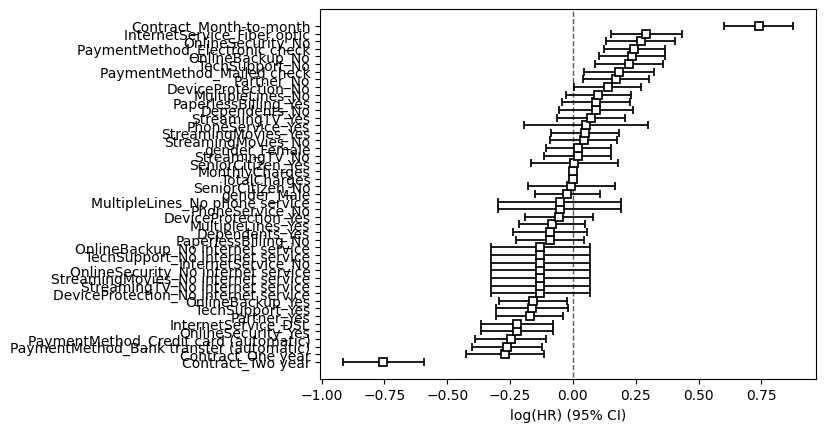

In [ ]:
cph.plot()
plt.show()


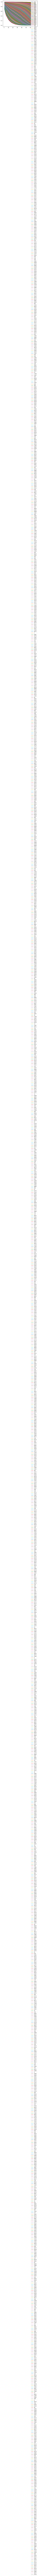

In [ ]:
survival_functions = cph.predict_survival_function(survival_test)
survival_functions.plot()
plt.show()


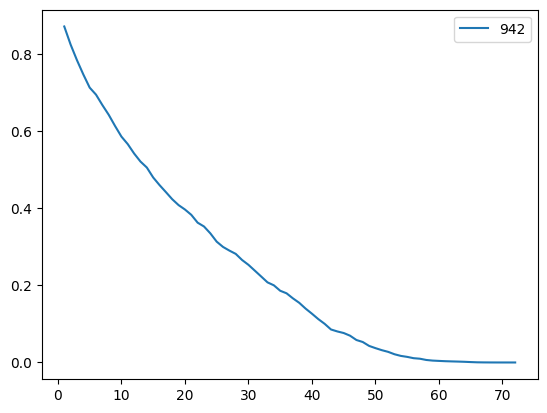

In [ ]:
survival_pred = cph.predict_survival_function(survival_test.iloc[0:1])
survival_pred.plot()
plt.show()
# Predict Individual Survival Functions Example: Predict for the first test customer.

In [ ]:
cph.predict_median(survival_test)
#  Predict Median Survival Time Estimate how long a customer is likely to stay before churning.

# If you're getting inf (infinity) from cph.predict_median(survival_test), it means that for some customers, the model predicts no median survival time (they never reach a 50% churn probability within the observed period).

942     15.0
503      inf
4848    42.0
4143     8.0
5875     inf
        ... 
3678    36.0
6245     inf
5496    69.0
3837     inf
5719    32.0
Name: 0.5, Length: 1758, dtype: float64

In [ ]:
median_survival = cph.predict_median(survival_test)

# Replace 'inf' with a meaningful message
median_survival_display = median_survival.apply(lambda x: "Not likely to churn" if np.isinf(x) else x)

print(median_survival_display)


942                    15.0
503     Not likely to churn
4848                   42.0
4143                    8.0
5875    Not likely to churn
               ...         
3678                   36.0
6245    Not likely to churn
5496                   69.0
3837    Not likely to churn
5719                   32.0
Name: 0.5, Length: 1758, dtype: object


### Model Evaluation

In [ ]:
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print("\nClass-wise Performance:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.7474
Precision: 0.5162
Recall: 0.7837
F1-Score: 0.6224
AUC-ROC: 0.8393

Class-wise Performance:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1291
           1       0.52      0.78      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.75      0.76      1758



In [ ]:
from sklearn.metrics import accuracy_score

# Get indexes of actual class labels
class_0_indices = (y_test == 0)
class_1_indices = (y_test == 1)

# Compute accuracy for each class separately
accuracy_class_0 = accuracy_score(y_test[class_0_indices], y_pred[class_0_indices])
accuracy_class_1 = accuracy_score(y_test[class_1_indices], y_pred[class_1_indices])

print(f"Class 0 (No Churn) Accuracy: {accuracy_class_0:.4f}")
print(f"Class 1 (Churn) Accuracy: {accuracy_class_1:.4f}")


Class 0 (No Churn) Accuracy: 0.7343
Class 1 (Churn) Accuracy: 0.7837


<Axes: >

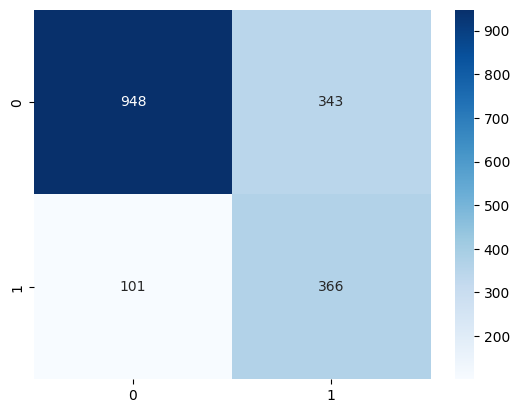

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

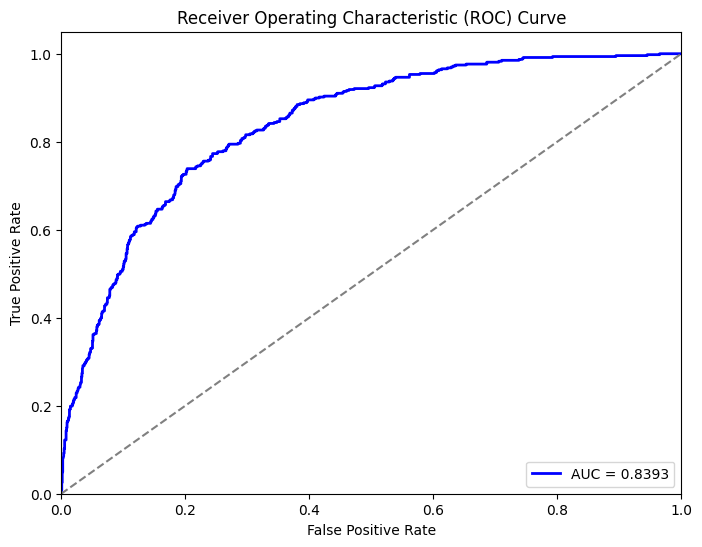

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


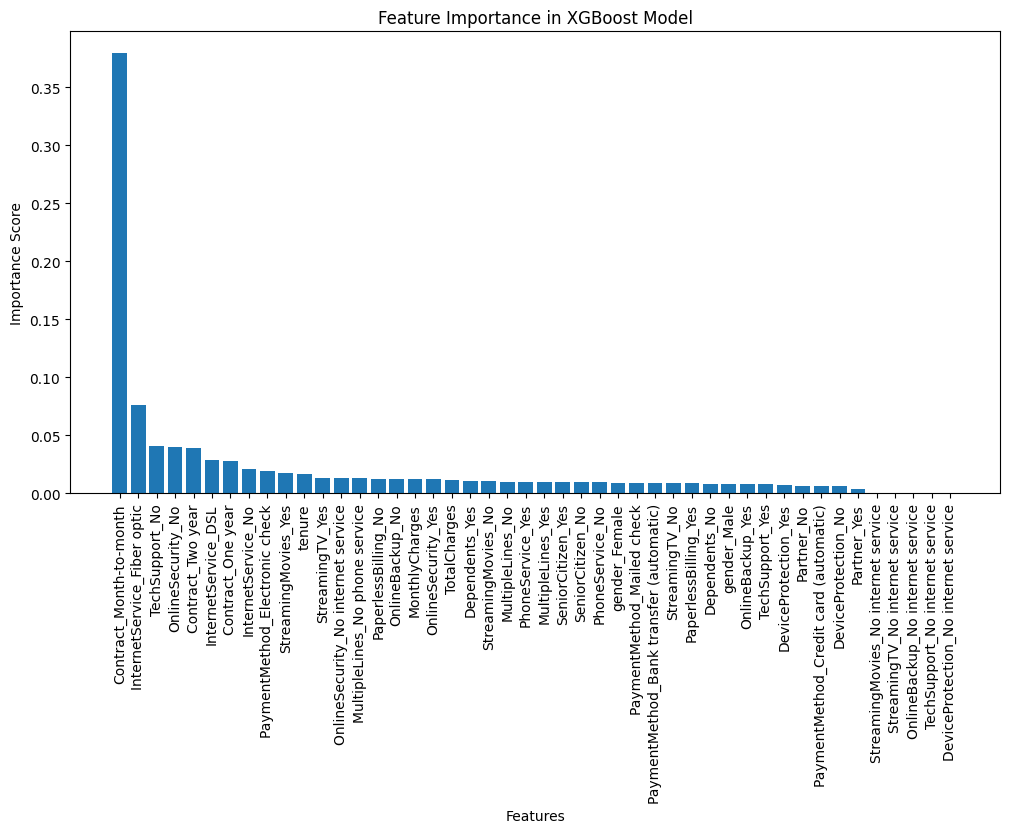

In [ ]:
# Check feature importance

# Get feature importance
feature_importance = best_model.feature_importances_

# Get feature names
feature_names = X_final.columns  # Ensure this matches your model's input

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in XGBoost Model")
plt.show()


In [ ]:
# Top 10 features

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))  # Show top 10 important features


                           Feature  Importance
37         Contract_Month-to-month    0.379165
17     InternetService_Fiber optic    0.075869
28                  TechSupport_No    0.041070
19               OnlineSecurity_No    0.040192
39               Contract_Two year    0.039388
16             InternetService_DSL    0.028872
38               Contract_One year    0.027900
18              InternetService_No    0.020936
44  PaymentMethod_Electronic check    0.019587
36             StreamingMovies_Yes    0.017933


In [ ]:
import pandas as pd
import pickle
import numpy as np

# Load saved encoder, scaler, and model
with open("encoder_churn.pkl", "rb") as f:
    ohe = pickle.load(f)

with open("scaler_churn.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("best_model_churn.pkl", "rb") as f:
    model = pickle.load(f)

with open("encoded_columns.pkl", "rb") as f:
    encoded_columns = pickle.load(f)

with open("feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)

# 🔹 Example New Customer Data (Modify as needed)
new_customer = {
    'customerID': '7590-VHVEG',  # This will be removed
    'SeniorCitizen': 1,
    'tenure': 12,
    'MonthlyCharges': 70.5,
    'TotalCharges': 850.0,
    'gender': 'Male',
    'Partner': 'Yes',
    'Dependents': 'No',
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Credit card (automatic)',
}

# 🔹 Remove `customerID`
new_customer.pop("customerID", None)

# Convert to DataFrame
new_data = pd.DataFrame([new_customer])

new_data["SeniorCitizen"]= new_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

# 🔹 Ensure correct data types
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = list(ohe.feature_names_in_)

new_data[numerical_features] = new_data[numerical_features].astype(float)  # Convert to float
new_data[categorical_features] = new_data[categorical_features].astype(str)  # Convert to string

# 🔹 One-hot encode categorical features
encoded_data = ohe.transform(new_data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

# 🔹 Combine with numerical features
new_numerical = new_data[numerical_features].reset_index(drop=True)
new_processed = pd.concat([new_numerical, encoded_df], axis=1)

# 🔹 Ensure the feature order matches training data & add missing columns
new_processed = new_processed.reindex(columns=feature_names, fill_value=0)

# 🔹 Scale numerical columns
new_processed[numerical_features] = scaler.transform(new_processed[numerical_features])

# 🔹 Make prediction
prediction = model.predict(new_processed)[0]
probability = model.predict_proba(new_processed)[0][1]

# 🔹 Output result
print("Predicted Churn:", "Yes" if prediction == 1 else "No")
print(f"Churn Probability: {probability:.4f}")


Predicted Churn: No
Churn Probability: 0.3017


In [ ]:
import pandas as pd
import pickle
import numpy as np

class ChurnPreprocessor:
    def __init__(self, encoder_path, scaler_path, model_path, encoded_columns_path, feature_names_path):
        # Load saved encoder, scaler, model, and feature metadata
        with open(encoder_path, "rb") as f:
            self.ohe = pickle.load(f)
        with open(scaler_path, "rb") as f:
            self.scaler = pickle.load(f)
        with open(model_path, "rb") as f:
            self.model = pickle.load(f)
        with open(encoded_columns_path, "rb") as f:
            self.encoded_columns = pickle.load(f)
        with open(feature_names_path, "rb") as f:
            self.feature_names = pickle.load(f)

        # Define feature types
        self.numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        self.categorical_features = list(self.ohe.feature_names_in_)

    def preprocess(self, customer_data):
        # Remove `customerID` if present
        customer_data.pop("customerID", None)

        # Convert to DataFrame
        new_data = pd.DataFrame([customer_data])

        # Ensure `SeniorCitizen` is mapped correctly
        new_data["SeniorCitizen"] = new_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

        # Ensure correct data types
        new_data[self.numerical_features] = new_data[self.numerical_features].astype(float)
        new_data[self.categorical_features] = new_data[self.categorical_features].astype(str)

        # One-hot encode categorical features
        encoded_data = self.ohe.transform(new_data[self.categorical_features])
        encoded_df = pd.DataFrame(encoded_data, columns=self.ohe.get_feature_names_out())

        # Combine with numerical features
        new_numerical = new_data[self.numerical_features].reset_index(drop=True)
        new_processed = pd.concat([new_numerical, encoded_df], axis=1)

        # Ensure correct feature order & add missing columns
        new_processed = new_processed.reindex(columns=self.feature_names, fill_value=0)

        # Scale numerical columns
        new_processed[self.numerical_features] = self.scaler.transform(new_processed[self.numerical_features])

        return new_processed

    def predict(self, customer_data):
        # Preprocess input data
        processed_data = self.preprocess(customer_data)

        # Make prediction
        prediction = self.model.predict(processed_data)[0]
        probability = self.model.predict_proba(processed_data)[0][1]
        if prediction == 1:
            return "Yes"
        else:
            return "No"


In [ ]:
preprocessor = ChurnPreprocessor("encoder_churn.pkl", "scaler_churn.pkl", "best_model_churn.pkl", "encoded_columns.pkl", "feature_names.pkl")


new_customer = {
    'customerID': '7590-VHVEG',  # This will be removed
    'SeniorCitizen': 0,
    'tenure': 5,
    'MonthlyCharges': 40.5,
    'TotalCharges': 50.0,
    'gender': 'Male',
    'Partner': 'No',
    'Dependents': 'Yes',
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Credit card (automatic)',
}

result = preprocessor.predict(new_customer)


In [ ]:
print(result)

No


# Combined model

Churn = Yes: 'tenure' is the number of months the customer stayed before churning (the survival time until the event).

Churn = No: 'tenure' is the number of months the customer has been with the service up to the observation point, and since they haven't churned, this is a censored observation (they might churn later).

CoxPHFitter (Cox Proportional Hazards Model)
The CoxPHFitter from the lifelines library is used to perform survival analysis. It models the relationship between multiple predictor variables (features) and the survival time of individuals.

How It Works
It estimates the effect of each variable on survival time.

Unlike linear regression, it doesn’t assume a specific distribution for survival times.

It computes hazard ratios, which show how a variable increases or decreases the risk of an event occurring (e.g., customer churn, patient death).

Positive coefficients → Increase the hazard (higher chance of event occurring).

Negative coefficients → Decrease the hazard (lower chance of event occurring).

p-values → Check if a variable is statistically significant.

This Hazard Ratio Analysis from your Cox Proportional Hazards Model (CoxPHFitter) gives insights into how different features affect customer churn risk.


In [ ]:
import pandas as pd
import pickle
import numpy as np

class ChurnPreprocessor:
    def __init__(self, encoder_path, scaler_path, clf_model_path, cox_model_path, encoded_columns_path, feature_names_path):
        # Load saved encoder, scaler, models, and feature metadata
        with open(encoder_path, "rb") as f:
            self.ohe = pickle.load(f)
        with open(scaler_path, "rb") as f:
            self.scaler = pickle.load(f)
        with open(clf_model_path, "rb") as f:
            self.clf_model = pickle.load(f)  # Classification model
        with open(cox_model_path, "rb") as f:
            self.cox_model = pickle.load(f)  # Cox Proportional Hazards model
        with open(encoded_columns_path, "rb") as f:
            self.encoded_columns = pickle.load(f)
        with open(feature_names_path, "rb") as f:
            self.feature_names = pickle.load(f)

        # Define feature types
        self.numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        self.categorical_features = list(self.ohe.feature_names_in_)

    def preprocess(self, customer_data):
        # Remove `customerID` if present
        customer_data.pop("customerID", None)

        # Convert to DataFrame
        new_data = pd.DataFrame([customer_data])

        # Ensure `SeniorCitizen` is mapped correctly
        new_data["SeniorCitizen"] = new_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

        # Ensure correct data types
        new_data[self.numerical_features] = new_data[self.numerical_features].astype(float)
        new_data[self.categorical_features] = new_data[self.categorical_features].astype(str)

        # One-hot encode categorical features
        encoded_data = self.ohe.transform(new_data[self.categorical_features])
        encoded_df = pd.DataFrame(encoded_data, columns=self.ohe.get_feature_names_out())

        # Combine with numerical features
        new_numerical = new_data[self.numerical_features].reset_index(drop=True)
        new_processed = pd.concat([new_numerical, encoded_df], axis=1)

        # Ensure correct feature order & add missing columns
        new_processed = new_processed.reindex(columns=self.feature_names, fill_value=0)

        # Scale numerical columns
        new_processed[self.numerical_features] = self.scaler.transform(new_processed[self.numerical_features])

        return new_processed

    def predict_churn(self, customer_data):
        # Preprocess input data
        processed_data = self.preprocess(customer_data)

        # Make churn prediction
        prediction = self.clf_model.predict(processed_data)[0]
        probability = self.clf_model.predict_proba(processed_data)[0][1]

        return prediction, probability  # 1 = Yes, 0 = No

    def predict_survival_time(self, customer_data):
        # Preprocess input data (drop 'tenure' for Cox model)
        processed_data = self.preprocess(customer_data)
        processed_data = processed_data.drop(columns=["tenure"])  # Remove tenure before survival prediction

        # Predict median survival time
        predicted_median_time = self.cox_model.predict_median(processed_data)

        # Convert `inf` to None
        if np.isinf(predicted_median_time.iloc[0]):
            return None
        return predicted_median_time.iloc[0]

    def predict_customer(self, customer_data):
        churn_pred, probability = self.predict_churn(customer_data)

        if churn_pred == 0:  # No churn
            return "Not likely to churn"
        else:  # Yes churn
            survival_time = self.predict_survival_time(customer_data)
            if survival_time is None:
                return "Likely to churn, but survival time not available"
            return f"Likely to churn in {survival_time:.1f} months"





In [ ]:
# Initialize the processor with classification and survival models
preprocessor = ChurnPreprocessor(
    "encoder_churn.pkl", "scaler_churn.pkl", "best_model_churn.pkl", "cox_model.pkl", "encoded_columns.pkl", "feature_names.pkl"
)

# Sample customer data
new_customer = {
    'customerID': '7590-VHVEG',  # This will be removed
    'SeniorCitizen': 0,
    'tenure': 5,
    'MonthlyCharges': 40.5,
    'TotalCharges': 50.0,
    'gender': 'Male',
    'Partner': 'No',
    'Dependents': 'Yes',
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'One year',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Credit card (automatic)',
}

# Get Final Prediction
result = preprocessor.predict_customer(new_customer)
print("Customer Churn Prediction:", result)

Customer Churn Prediction: Not likely to churn


In [ ]:
import pandas as pd
import pickle
import numpy as np
from lifelines import CoxPHFitter

class ChurnPreprocessor:
    def __init__(self, encoder_path, scaler_path, model_path, survival_model_path, encoded_columns_path, feature_names_path):
        # Load saved encoder, scaler, and models
        with open(encoder_path, "rb") as f:
            self.ohe = pickle.load(f)
        with open(scaler_path, "rb") as f:
            self.scaler = pickle.load(f)
        with open(model_path, "rb") as f:
            self.model = pickle.load(f)
        with open(survival_model_path, "rb") as f:
            self.survival_model = pickle.load(f)
        with open(encoded_columns_path, "rb") as f:
            self.encoded_columns = pickle.load(f)
        with open(feature_names_path, "rb") as f:
            self.feature_names = pickle.load(f)

        # Define feature types
        self.numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        self.categorical_features = list(self.ohe.feature_names_in_)

        # Extract hazard ratios
        self.hazard_ratios = self.survival_model.summary[['exp(coef)']]
        self.hazard_ratios = self.hazard_ratios.sort_values(by='exp(coef)', ascending=False)

    def preprocess(self, customer_data):
        # Remove `customerID` if present
        customer_data.pop("customerID", None)

        # Convert to DataFrame
        new_data = pd.DataFrame([customer_data])

        # Ensure `SeniorCitizen` is mapped correctly
        new_data["SeniorCitizen"] = new_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

        # Ensure correct data types
        new_data[self.numerical_features] = new_data[self.numerical_features].astype(float)
        new_data[self.categorical_features] = new_data[self.categorical_features].astype(str)

        # One-hot encode categorical features
        encoded_data = self.ohe.transform(new_data[self.categorical_features])
        encoded_df = pd.DataFrame(encoded_data, columns=self.ohe.get_feature_names_out())

        # Combine with numerical features
        new_numerical = new_data[self.numerical_features].reset_index(drop=True)
        new_processed = pd.concat([new_numerical, encoded_df], axis=1)

        # Ensure correct feature order & add missing columns
        new_processed = new_processed.reindex(columns=self.feature_names, fill_value=0)

        # Scale numerical columns
        new_processed[self.numerical_features] = self.scaler.transform(new_processed[self.numerical_features])

        return new_processed, new_data  # Return both processed and original data

    def generate_retention_strategy(self, customer_data):
        """Generate retention strategies based on hazard ratios."""
        strategies = []

        for feature in self.hazard_ratios.index:
            if feature in customer_data:
                value = customer_data[feature]
                hazard_ratio = self.hazard_ratios.loc[feature, 'exp(coef)']

                if hazard_ratio > 1.2:  # High churn risk
                    if feature == 'Contract_Month-to-month':
                        strategies.append("Offer discounts for yearly plans.")
                    elif feature == 'TechSupport_No':
                        strategies.append("Provide free tech support for 3 months.")
                    elif feature == 'InternetService_Fiber optic':
                        strategies.append("Highlight better service benefits.")
                    elif feature == 'MonthlyCharges':
                        strategies.append("Provide loyalty discounts.")
                    elif feature == 'OnlineSecurity_No':
                        strategies.append("Offer free security trial.")

        return strategies

    def predict(self, customer_data):
        # Preprocess input data
        processed_data, original_data = self.preprocess(customer_data)

        # Churn classification prediction
        prediction = self.model.predict(processed_data)[0]
        probability = self.model.predict_proba(processed_data)[0][1]

        if prediction == 0:
            return "Not likely to churn"

        # Predict survival time
        survival_time = self.survival_model.predict_median(processed_data)
        if np.isscalar(survival_time) or np.isinf(survival_time):
          return "Not likely to churn"
        else:
          return f"Likely to churn in {round(survival_time, 1)} months. {self.get_retention_strategy(processed_data)}"


        # Generate retention strategy
        retention_strategies = self.generate_retention_strategy(original_data.iloc[0])

        return f"Likely to churn in {int(survival_time)} months. Retention strategies: {', '.join(retention_strategies)}"

# Initialize preprocessor with survival model
preprocessor = ChurnPreprocessor("encoder_churn.pkl", "scaler_churn.pkl", "best_model_churn.pkl", "cox_model.pkl", "encoded_columns.pkl", "feature_names.pkl")

# Example customer
new_customer = {
    'customerID': '7590-VHVEG',
    'SeniorCitizen': 0,
    'tenure': 5,
    'MonthlyCharges': 40.5,
    'TotalCharges': 50.0,
    'gender': 'Male',
    'Partner': 'No',
    'Dependents': 'Yes',
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Credit card (automatic)',
}

result = preprocessor.predict(new_customer)
print(result)


Not likely to churn


In [ ]:
import pandas as pd
import pickle
import numpy as np

class ChurnPreprocessor:
    def __init__(self, encoder_path, scaler_path, model_path, survival_model_path, encoded_columns_path, feature_names_path):
        # Load saved encoder, scaler, models, and feature metadata
        with open(encoder_path, "rb") as f:
            self.ohe = pickle.load(f)
        with open(scaler_path, "rb") as f:
            self.scaler = pickle.load(f)
        with open(model_path, "rb") as f:
            self.model = pickle.load(f)
        with open(survival_model_path, "rb") as f:
            self.survival_model = pickle.load(f)
        with open(encoded_columns_path, "rb") as f:
            self.encoded_columns = pickle.load(f)
        with open(feature_names_path, "rb") as f:
            self.feature_names = pickle.load(f)

        # Define feature types
        self.numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        self.categorical_features = list(self.ohe.feature_names_in_)

    def preprocess(self, customer_data):
        # Extract customer ID
        customer_id = customer_data.pop("customerID", "Unknown")

        # Convert to DataFrame
        new_data = pd.DataFrame([customer_data])

        # Ensure `SeniorCitizen` is mapped correctly
        new_data["SeniorCitizen"] = new_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

        # Ensure correct data types
        new_data[self.numerical_features] = new_data[self.numerical_features].astype(float)
        new_data[self.categorical_features] = new_data[self.categorical_features].astype(str)

        # One-hot encode categorical features
        encoded_data = self.ohe.transform(new_data[self.categorical_features])
        encoded_df = pd.DataFrame(encoded_data, columns=self.ohe.get_feature_names_out())

        # Combine with numerical features
        new_numerical = new_data[self.numerical_features].reset_index(drop=True)
        new_processed = pd.concat([new_numerical, encoded_df], axis=1)

        # Ensure correct feature order & add missing columns
        new_processed = new_processed.reindex(columns=self.feature_names, fill_value=0)

        # Scale numerical columns
        new_processed[self.numerical_features] = self.scaler.transform(new_processed[self.numerical_features])

        return customer_id, new_processed

    def predict(self, customer_data):
        customer_id = customer_data.get("customerID", "Unknown")

        # Preprocess input data and unpack tuple
        customer_id, new_processed = self.preprocess(customer_data)

        # Keep DataFrame version for survival model (Cox PH needs column names)
        new_processed_df = new_processed.copy()

        # Convert to NumPy array for XGBoost
        new_processed_array = new_processed.values

        # Predict classification
        churn_prediction = self.model.predict(new_processed_array)[0]
        churn_probability = self.model.predict_proba(new_processed_array)[0][1]

        # Predict survival time using DataFrame (Cox PH expects named columns)
        survival_time = self.survival_model.predict_median(new_processed_df)  # No [0] needed

        # Get hazard ratios
        hazard_ratios = np.exp(self.survival_model.params_)

        # Find top churn reasons (highest hazard ratio features)
        customer_features = pd.Series(new_processed_array[0], index=self.feature_names)
        feature_impact = customer_features * hazard_ratios
        top_churn_reasons = feature_impact.nlargest(3).index.tolist()

        # Output Prediction
        if churn_prediction == 0:
            return f"🔍 **Expected Customer Behavior for Customer ID: {customer_id}**\n✅ **Not likely to churn**"
        else:
            if np.isinf(survival_time):
                return f"🔍 **Expected Customer Behavior for Customer ID: {customer_id}**\n✅ **Not likely to churn**"
            else:
                return (
                    f"🔍 **Expected Customer Behavior for Customer ID: {customer_id}**\n"
                    f"⚠️ **Likely to churn in {survival_time:.2f} months**\n\n"
                    f"📌 **Top Reasons for Churn:**\n"
                    f"🔸 {top_churn_reasons[0]}\n"
                    f"🔸 {top_churn_reasons[1]}\n"
                    f"🔸 {top_churn_reasons[2]}"
                )

    def generate_retention_strategy(self, customer_data):
        # Extract hazard ratios from Cox model
        hazard_ratios = np.exp(self.survival_model.params_)

        # Sort by impact on churn
        high_risk_features = hazard_ratios[hazard_ratios > 1].sort_values(ascending=False)

        strategy = []

        # Check customer’s features against high-risk factors
        for feature in high_risk_features.index:
            if feature in customer_data:
                value = customer_data[feature]

                if feature == "tenure" and value < 6:
                    strategy.append("📌 Offer a loyalty discount to new customers to increase tenure.")
                elif feature == "InternetService_Fiber optic" and value == "Fiber optic":
                    strategy.append("📌 Provide a discount or bundle to offset high Fiber optic costs.")
                elif feature == "Contract_Month-to-month" and value == "Month-to-month":
                    strategy.append("📌 Encourage long-term contracts with discounts or perks.")
                elif feature == "PaymentMethod_Electronic check" and value == "Electronic check":
                    strategy.append("📌 Suggest switching to automatic payments for convenience.")

        if not strategy:
            return "📌 Offer personalized customer support and incentives."
        return "\n".join(strategy)

# Load the preprocessor
preprocessor = ChurnPreprocessor(
    "encoder_churn.pkl",
    "scaler_churn.pkl",
    "best_model_churn.pkl",
    "cox_model.pkl",
    "encoded_columns.pkl",
    "feature_names.pkl"
)

In [ ]:
!pip install lifelines scikit-survival


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=815ac5ec43aa06ce8f0db10e7a4e303c01a45b5aa2d97d2a6d6d57558e72f604
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.1
    Uninstalling osqp-

In [ ]:
import pandas as pd
import pickle
import numpy as np
from lifelines import CoxPHFitter
from sksurv.util import Surv

class ChurnPreprocessor:
    def __init__(self, encoder_path, scaler_path, model_path, survival_model_path, encoded_columns_path, feature_names_path):
        # Load saved encoder, scaler, models, and feature metadata
        with open(encoder_path, "rb") as f:
            self.ohe = pickle.load(f)
        with open(scaler_path, "rb") as f:
            self.scaler = pickle.load(f)
        with open(model_path, "rb") as f:
            self.model = pickle.load(f)
        with open(survival_model_path, "rb") as f:
            self.survival_model = pickle.load(f)
        with open(encoded_columns_path, "rb") as f:
            self.encoded_columns = pickle.load(f)
        with open(feature_names_path, "rb") as f:
            self.feature_names = pickle.load(f)

        # Define feature types
        self.numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
        self.categorical_features = list(self.ohe.feature_names_in_)

    def preprocess(self, customer_data):
        # Extract customer ID
        customer_id = customer_data.pop("customerID", "Unknown")

        # Convert to DataFrame
        new_data = pd.DataFrame([customer_data])

        # Ensure `SeniorCitizen` is mapped correctly
        new_data["SeniorCitizen"] = new_data["SeniorCitizen"].map({0: "No", 1: "Yes"})

        # Ensure correct data types
        new_data[self.numerical_features] = new_data[self.numerical_features].astype(float)
        new_data[self.categorical_features] = new_data[self.categorical_features].astype(str)

        # One-hot encode categorical features
        encoded_data = self.ohe.transform(new_data[self.categorical_features])
        encoded_df = pd.DataFrame(encoded_data, columns=self.ohe.get_feature_names_out())

        # Combine with numerical features
        new_numerical = new_data[self.numerical_features].reset_index(drop=True)
        new_processed = pd.concat([new_numerical, encoded_df], axis=1)

        # Ensure correct feature order & add missing columns
        new_processed = new_processed.reindex(columns=self.feature_names, fill_value=0)

        # Scale numerical columns
        new_processed[self.numerical_features] = self.scaler.transform(new_processed[self.numerical_features])

        return customer_id, new_processed

    def get_hazard_ratio_table(self):
        """Returns a formatted DataFrame of hazard ratios and interpretations."""
        hazard_ratios = np.exp(self.survival_model.params_)

        # Create interpretation strings
        interpretations = []
        for hr in hazard_ratios:
            if hr > 1:
                interpretations.append(f"{hr:.1f}x higher churn risk")
            elif hr < 1:
                interpretations.append(f"{1/hr:.1f}x lower risk (protective)")
            else:
                interpretations.append("No effect")

        # Build DataFrame
        hr_table = pd.DataFrame({
            "Feature": hazard_ratios.index,
            "Hazard Ratio": hazard_ratios.values,
            "Interpretation": interpretations
        })

        return hr_table.sort_values("Hazard Ratio", ascending=False)

    def print_hazard_analysis(self):
        """Prints hazard ratios in a clean table and separates retention/churn drivers."""
        hr_table = self.get_hazard_ratio_table()

        # Print formatted table
        print("\n📊 **Hazard Ratio Analysis**")
        print(hr_table.to_markdown(tablefmt="grid", index=False))

        # Split into retention/churn drivers
        retention_drivers = hr_table[hr_table["Hazard Ratio"] < 1]
        churn_drivers = hr_table[hr_table["Hazard Ratio"] > 1]

        print("\n🔵 **Retention Drivers (Protective Factors)**")
        if not retention_drivers.empty:
            print(retention_drivers[["Feature", "Hazard Ratio"]].to_markdown(tablefmt="grid", index=False))
        else:
            print("No significant retention drivers found.")

        print("\n🔴 **Churn Drivers (Risk Factors)**")
        if not churn_drivers.empty:
            print(churn_drivers[["Feature", "Hazard Ratio"]].to_markdown(tablefmt="grid", index=False))
        else:
            print("No significant churn drivers found.")

    def predict(self, customer_data):
        customer_id = customer_data.get("customerID", "Unknown")

        # Preprocess input data and unpack tuple
        customer_id, new_processed = self.preprocess(customer_data)

        # Keep DataFrame version for survival model (Cox PH needs column names)
        new_processed_df = new_processed.copy()

        # Convert to NumPy array for XGBoost
        new_processed_array = new_processed.values

        # Predict classification
        churn_prediction = self.model.predict(new_processed_array)[0]
        churn_probability = self.model.predict_proba(new_processed_array)[0][1]

        # Predict survival time using DataFrame (Cox PH expects named columns)
        survival_time = self.survival_model.predict_median(new_processed_df)

        # Get hazard ratios
        hazard_ratios = np.exp(self.survival_model.params_)

        # Find top churn reasons (highest hazard ratio features)
        customer_features = pd.Series(new_processed_array[0], index=self.feature_names)
        feature_impact = customer_features * hazard_ratios
        top_churn_reasons = feature_impact.nlargest(5).index.tolist()

        # Output Prediction
        if churn_prediction == 0:
            return f"🔍 **Expected Customer Behavior for Customer ID: {customer_id}**\n✅ **Not likely to churn**"
        else:
            if np.isinf(survival_time):
                return f"🔍 **Expected Customer Behavior for Customer ID: {customer_id}**\n✅ **Not likely to churn**"
            else:
                return (
                    f"🔍 **Expected Customer Behavior for Customer ID: {customer_id}**\n"
                    f"⚠️ **Likely to churn in {survival_time:.2f} months**\n\n"
                    f"📌 **Top Reasons for Churn:**\n"
                    f"🔸 {top_churn_reasons[0].replace('_', ': ')}\n"
                    f"🔸 {top_churn_reasons[1].replace('_', ': ')}\n"
                    f"🔸 {top_churn_reasons[2].replace('_', ': ')}\n"
                    f"🔸 {top_churn_reasons[3].replace('_', ': ')}\n"
                    f"🔸 {top_churn_reasons[4].replace('_', ': ')}"
                )


# Example Usage
preprocessor = ChurnPreprocessor(
    "encoder_churn.pkl",
    "scaler_churn.pkl",
    "best_model_churn.pkl",
    "cox_model.pkl",
    "encoded_columns.pkl",
    "feature_names.pkl"
)



In [ ]:
# Print hazard ratio analysis
preprocessor.print_hazard_analysis()


📊 **Hazard Ratio Analysis**
+-----------------------------------------+----------------+------------------------------+
| Feature                                 |   Hazard Ratio | Interpretation               |
+=========================================+================+==============================+
| Contract_Month-to-month                 |       2.09602  | 2.1x higher churn risk       |
+-----------------------------------------+----------------+------------------------------+
| InternetService_Fiber optic             |       1.33942  | 1.3x higher churn risk       |
+-----------------------------------------+----------------+------------------------------+
| OnlineSecurity_No                       |       1.30937  | 1.3x higher churn risk       |
+-----------------------------------------+----------------+------------------------------+
| PaymentMethod_Electronic check          |       1.27652  | 1.3x higher churn risk       |
+-----------------------------------------+--------

In [ ]:
# Test Example
new_customer = {
    'customerID': '7228-OMTPN',
    'SeniorCitizen': 0,
    'tenure': 4,
    'MonthlyCharges': 88.45,
    'TotalCharges': 370.65,
    'gender': 'Male',
    'Partner': 'No',
    'Dependents': 'No',
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
}

# Run Prediction
result = preprocessor.predict(new_customer)
print(result)

🔍 **Expected Customer Behavior for Customer ID: 7228-OMTPN**
⚠️ **Likely to churn in 5.00 months**

📌 **Top Reasons for Churn:**
🔸 Contract: Month-to-month
🔸 InternetService: Fiber optic
🔸 OnlineSecurity: No
🔸 PaymentMethod: Electronic check
🔸 OnlineBackup: No
